<a href="https://colab.research.google.com/github/PauloMarvin/ETL-CVM/blob/data-analysis/02_data_analysis_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando dependências do Spark

In [1]:
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

Importando OS

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()

Importando SparkSession

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .getOrCreate()

In [5]:
spark

Instalação de bibliotecas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [7]:
sns.set()

# Carregando os dados no *dataframe*

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = spark.read.csv(
    '/content/drive/MyDrive/cvm_2000_2022.csv', 
    inferSchema= True, header= True
)

In [12]:
df.show(5)

+---+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+
|_c0|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|VL_TOTAL| VL_QUOTA|VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|
+---+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+
|  0|   FITVM|01.465.738/0001-97|2000-01-03|    null|2.5972313|    2588000.0|  91000.0|     0.0|    null|
|  1|   FITVM|01.465.738/0001-97|2000-01-04|    null|2.4597298|    2543000.0|      0.0| 17000.0|    null|
|  2|   FITVM|01.465.738/0001-97|2000-01-05|    null|2.4035701|    2467000.0|  44000.0|  2000.0|    null|
|  3|   FITVM|01.465.738/0001-97|2000-01-06|    null|2.4648947|    2573000.0|  21000.0|     0.0|    null|
|  4|   FITVM|01.465.738/0001-97|2000-01-07|    null|2.5131104|    2646000.0|   3000.0|     0.0|    null|
+---+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+
only showing top 5 rows



* A coluna `_c0` pode ser renomeada:

In [13]:
df = df.withColumnRenamed('_c0', 'index')
df.show(5)

+-----+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+
|index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|VL_TOTAL| VL_QUOTA|VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|
+-----+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+
|    0|   FITVM|01.465.738/0001-97|2000-01-03|    null|2.5972313|    2588000.0|  91000.0|     0.0|    null|
|    1|   FITVM|01.465.738/0001-97|2000-01-04|    null|2.4597298|    2543000.0|      0.0| 17000.0|    null|
|    2|   FITVM|01.465.738/0001-97|2000-01-05|    null|2.4035701|    2467000.0|  44000.0|  2000.0|    null|
|    3|   FITVM|01.465.738/0001-97|2000-01-06|    null|2.4648947|    2573000.0|  21000.0|     0.0|    null|
|    4|   FITVM|01.465.738/0001-97|2000-01-07|    null|2.5131104|    2646000.0|   3000.0|     0.0|    null|
+-----+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+
only showing top 5 rows



## Dimensões do *dataframe*

In [14]:
print(f'Há {len(df.columns)} colunas no dataframe.')
print(f'Com {df.select("index").count()} linhas no dataframe.')

Há 10 colunas no dataframe.
Com 57676391 linhas no dataframe.


## *Schema* do *dataframe*

In [15]:
df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- TP_FUNDO: string (nullable = true)
 |-- CNPJ_FUNDO: string (nullable = true)
 |-- DT_COMPTC: string (nullable = true)
 |-- VL_TOTAL: double (nullable = true)
 |-- VL_QUOTA: double (nullable = true)
 |-- VL_PATRIM_LIQ: double (nullable = true)
 |-- CAPTC_DIA: double (nullable = true)
 |-- RESG_DIA: double (nullable = true)
 |-- NR_COTST: double (nullable = true)



# Derivando novas colunas da coluna `dt_comptc`

In [16]:
from pyspark.sql.functions import month, year

Duas novas colunas são derivadas da coluna contendo datas, são as colunas: `month` e `year`.

In [17]:
df = df.withColumn('MONTH', month('dt_comptc'))\
                     .withColumn('YEAR', year('dt_comptc')) 

In [18]:
df.show(5)

+-----+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+-----+----+
|index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|VL_TOTAL| VL_QUOTA|VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+-----+--------+------------------+----------+--------+---------+-------------+---------+--------+--------+-----+----+
|    0|   FITVM|01.465.738/0001-97|2000-01-03|    null|2.5972313|    2588000.0|  91000.0|     0.0|    null|    1|2000|
|    1|   FITVM|01.465.738/0001-97|2000-01-04|    null|2.4597298|    2543000.0|      0.0| 17000.0|    null|    1|2000|
|    2|   FITVM|01.465.738/0001-97|2000-01-05|    null|2.4035701|    2467000.0|  44000.0|  2000.0|    null|    1|2000|
|    3|   FITVM|01.465.738/0001-97|2000-01-06|    null|2.4648947|    2573000.0|  21000.0|     0.0|    null|    1|2000|
|    4|   FITVM|01.465.738/0001-97|2000-01-07|    null|2.5131104|    2646000.0|   3000.0|     0.0|    null|    1|2000|
+-----+--------+------------------+----------+--

# Análise exploratória

## Número de dados faltantes

In [19]:
from pyspark.sql.functions import count, when, isnull, countDistinct, sum, avg

In [20]:
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-----+--------+----------+---------+--------+--------+-------------+---------+--------+--------+-----+----+
|index|TP_FUNDO|CNPJ_FUNDO|DT_COMPTC|VL_TOTAL|VL_QUOTA|VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+-----+--------+----------+---------+--------+--------+-------------+---------+--------+--------+-----+----+
|    0|40860852|         0|        0|  366012|       0|            0|        0|       0|  365408|    0|   0|
+-----+--------+----------+---------+--------+--------+-------------+---------+--------+--------+-----+----+



Chama a atenção a quantidade de dados faltantes na coluna `tp_fundo` que é de cerca de 40.9 milhões de dados.

## Coluna `TP_FUNDO`

Verifica-se a quantidade de fundos presentes no *dataset* para cada categoria de fundo.

In [21]:
count_tp_fundo = df.groupBy('TP_FUNDO').count().toPandas().sort_values('count', ascending= True)

In [22]:
count_tp_fundo

,TP_FUNDO,count
3,FIIM,118
6,FIFDIV,755
11,FMP-FGTS CL,8226
1,FAPI,9395
8,FIEX,13624
7,FIC-FITVM,67022
4,FMP-FGTS,107997
9,FITVM,349153
10,FACFIF,492624
5,FIF,500219


* O dado nulo na coluna `tp_fundo` é substituído para 'Não definido':

In [23]:
count_tp_fundo.at[2, 'TP_FUNDO'] = 'Não definido'
count_tp_fundo

,TP_FUNDO,count
3,FIIM,118
6,FIFDIV,755
11,FMP-FGTS CL,8226
1,FAPI,9395
8,FIEX,13624
7,FIC-FITVM,67022
4,FMP-FGTS,107997
9,FITVM,349153
10,FACFIF,492624
5,FIF,500219


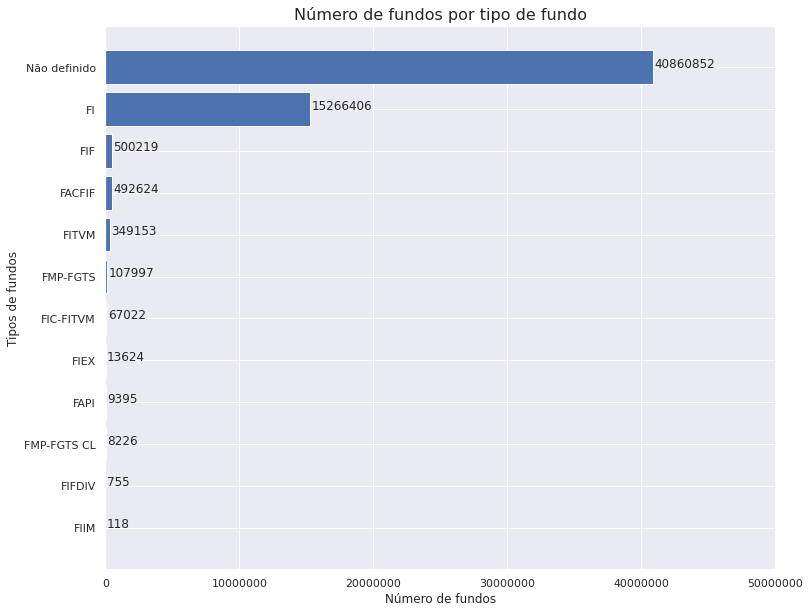

In [150]:
plt.figure(figsize= (12, 10))
plt.ticklabel_format(style='plain') # para que os valores no eixo y do gráfico não estejam em notação científica.
bars = plt.barh(y= count_tp_fundo['TP_FUNDO'], width= count_tp_fundo['count'])

for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 100000, index, bar.get_width(), fontsize= 12)

plt.title('Número de fundos por tipo de fundo', fontsize= 16)
plt.ylabel('Tipos de fundos')
plt.xlim([0, 50000000])
plt.xlabel('Número de fundos')
plt.show()

* Em que ano há a maior presença de fundos sem definição do seu tipo?

In [25]:
grouped_year_fundo = df.groupBy('YEAR', 'TP_FUNDO').count().sort('YEAR').show(n= 200)

+----+-----------+-------+
|YEAR|   TP_FUNDO|  count|
+----+-----------+-------+
|2000|   FMP-FGTS|      1|
|2000|  FIC-FITVM|      1|
|2000|      FITVM|    254|
|2001|      FITVM|    254|
|2001|  FIC-FITVM|      1|
|2001|   FMP-FGTS|      1|
|2002|   FMP-FGTS|  20578|
|2002|  FIC-FITVM|  20578|
|2002|FMP-FGTS CL|   1743|
|2002|      FITVM| 105690|
|2003|      FITVM| 124399|
|2003|  FIC-FITVM|  23354|
|2003|   FMP-FGTS|  26198|
|2003|FMP-FGTS CL|   1925|
|2003|        FIF|      6|
|2004|   FMP-FGTS|  24196|
|2004|     FIFDIV|    755|
|2004|FMP-FGTS CL|   1785|
|2004|         FI|   1753|
|2004|        FIF| 498797|
|2004|      FITVM| 118556|
|2004|     FACFIF| 491208|
|2004|       FIIM|    118|
|2004|  FIC-FITVM|  23088|
|2004|       FIEX|  13624|
|2005|       null|1458303|
|2006|       null|1487467|
|2007|       null|1738271|
|2008|       null|2076239|
|2009|       null|2048315|
|2010|       null|2290533|
|2011|       null|2560780|
|2012|       null|2756657|
|2013|       null|3065459|
|

Entre os anos 2005 e 2018 parece não haver especificação da categoria dos fundos.

## Coluna `CNPJ_FUNDO`

In [26]:
f"Número de diferentes fundos no dataset: {df.select('cnpj_fundo').distinct().count()}"

'Número de diferentes fundos no dataset: 46083'

* Os 50 fundos que mais aparecem no *dataset* são:

In [27]:
df.groupBy('CNPJ_FUNDO').count().sort('count', ascending= False).show(n= 50)

+------------------+-----+
|        CNPJ_FUNDO|count|
+------------------+-----+
|47.178.405/0001-88| 5250|
|00.463.569/0001-93| 5249|
|03.394.711/0001-86| 5249|
|02.171.479/0001-54| 5242|
|96.498.985/0001-04| 5242|
|47.178.058/0001-93| 5242|
|47.176.334/0001-84| 5242|
|02.838.578/0001-47| 5242|
|27.865.070/0001-69| 5241|
|04.881.676/0001-92| 5241|
|01.912.197/0001-06| 5241|
|03.917.780/0001-27| 5241|
|47.179.288/0001-77| 5241|
|03.913.949/0001-70| 5240|
|01.699.688/0001-02| 5240|
|00.398.561/0001-90| 5240|
|02.763.602/0001-26| 5240|
|02.763.747/0001-27| 5240|
|03.916.733/0001-69| 5240|
|04.806.420/0001-10| 5239|
|03.408.336/0001-86| 5239|
|03.929.530/0001-07| 5239|
|47.177.431/0001-91| 5239|
|04.573.850/0001-30| 5239|
|03.370.003/0001-05| 5239|
|04.573.842/0001-93| 5239|
|01.643.271/0001-28| 5239|
|04.881.177/0001-03| 5239|
|56.824.857/0001-80| 5239|
|04.881.197/0001-76| 5239|
|03.707.396/0001-08| 5239|
|03.209.409/0001-00| 5239|
|04.440.887/0001-90| 5239|
|04.328.542/0001-49| 5239|
|

* Os 50 fundos que mais aparecem no *dataset* até o ano 2010:

In [28]:
df.where(df['YEAR'] <= 2010).groupBy('CNPJ_FUNDO').count().sort('count', ascending= False).show(n= 50)

+------------------+-----+
|        CNPJ_FUNDO|count|
+------------------+-----+
|47.178.405/0001-88| 2225|
|03.394.711/0001-86| 2224|
|00.463.569/0001-93| 2224|
|01.626.781/0001-97| 2219|
|02.177.417/0001-50| 2218|
|47.178.058/0001-93| 2217|
|02.468.344/0001-55| 2217|
|96.498.985/0001-04| 2217|
|02.171.479/0001-54| 2217|
|47.176.334/0001-84| 2217|
|47.179.288/0001-77| 2216|
|27.865.070/0001-69| 2216|
|03.917.780/0001-27| 2216|
|01.715.238/0001-66| 2216|
|03.665.520/0001-01| 2216|
|01.912.197/0001-06| 2216|
|03.916.733/0001-69| 2215|
|73.960.635/0001-04| 2215|
|01.699.688/0001-02| 2215|
|00.398.561/0001-90| 2215|
|03.913.949/0001-70| 2215|
|03.218.354/0001-03| 2215|
|02.763.747/0001-27| 2215|
|02.763.602/0001-26| 2215|
|03.519.210/0001-89| 2214|
|01.715.969/0001-01| 2214|
|04.020.951/0001-83| 2214|
|03.644.821/0001-59| 2214|
|04.513.643/0001-90| 2214|
|04.328.542/0001-49| 2214|
|04.336.139/0001-61| 2214|
|04.440.887/0001-90| 2214|
|02.724.147/0001-50| 2214|
|01.879.280/0001-12| 2214|
|

* Os 50 fundos que mais aparecem no *dataset* de depois de 2010:

In [29]:
df.where(df['YEAR'] > 2010).groupBy('CNPJ_FUNDO').count().sort('count', ascending= False).show(50)

+------------------+-----+
|        CNPJ_FUNDO|count|
+------------------+-----+
|03.986.896/0001-18| 3030|
|02.838.578/0001-47| 3030|
|09.319.052/0001-08| 3029|
|10.468.196/0001-05| 3029|
|11.046.338/0001-09| 3029|
|04.881.687/0001-72| 3029|
|04.881.676/0001-92| 3029|
|09.720.551/0001-02| 3028|
|05.697.562/0001-50| 3028|
|07.900.281/0001-88| 3028|
|11.091.467/0001-00| 3026|
|11.349.450/0001-00| 3026|
|05.388.033/0001-74| 3026|
|08.833.547/0001-80| 3026|
|11.349.463/0001-80| 3026|
|11.349.442/0001-64| 3026|
|08.056.839/0001-53| 3026|
|11.274.288/0001-09| 3026|
|08.056.837/0001-64| 3026|
|03.826.405/0001-71| 3025|
|11.695.006/0001-47| 3025|
|08.744.460/0001-36| 3025|
|09.520.282/0001-22| 3025|
|07.889.704/0001-06| 3025|
|08.370.202/0001-37| 3025|
|07.535.827/0001-49| 3025|
|11.822.361/0001-30| 3025|
|05.102.500/0001-58| 3025|
|11.424.375/0001-03| 3025|
|05.615.522/0001-11| 3025|
|08.434.491/0001-90| 3025|
|11.859.602/0001-15| 3025|
|08.276.816/0001-54| 3025|
|11.002.807/0001-80| 3025|
|

## Coluna `VL_TOTAL`

### Estatísticas descritivas

In [30]:
df.select('vl_total').describe().show(truncate= False)

+-------+---------------------+
|summary|vl_total             |
+-------+---------------------+
|count  |57310379             |
|mean   |3.530323818966721E8  |
|stddev |2.9902593485264565E10|
|min    |-5.24478822941659E12 |
|max    |2.15700309082785E14  |
+-------+---------------------+



### Tendência central do `VL_TOTAL` em relação as datas

#### Para a média dos valores diários de 2000 até janeiro de 2023

In [31]:
avg_vl_total_per_date = df.groupBy('DT_COMPTC').agg(avg('VL_TOTAL')).sort('DT_COMPTC').toPandas()

In [32]:
fig = px.line(
    data_frame= avg_vl_total_per_date,
    x= 'DT_COMPTC',
    y= 'avg(VL_TOTAL)',
    markers= True,
    title= 'Média diária da variável VL_TOTAL por data'
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= 'Média de VL_TOTAL',
    xaxis_title= 'Dia'
)
fig.show()

* Em quais datas houve maior média da variável `VL_TOTAL`?

In [33]:
avg_vl_total_per_date.sort_values('avg(VL_TOTAL)', ascending= False)[:10]

,DT_COMPTC,avg(VL_TOTAL)
2690,2010-04-06,3.492314e+10
2413,2009-02-25,1.501062e+09
5934,2023-01-16,7.777795e+08
592,2002-04-24,7.543070e+08
3077,2011-10-18,7.222963e+08
850,2003-03-13,6.571049e+08
5397,2020-12-24,6.219614e+08
915,2003-06-06,5.622155e+08
586,2002-04-16,5.231137e+08
5050,2019-08-27,5.148510e+08


* Volume de dados no dia 06/04/2010 e nos dias próximos:

In [34]:
f" Dia 06/04/2010: {df.where(df['DT_COMPTC'] == '2010-04-06').count()} dados."

' Dia 06/04/2010: 8842 dados.'

In [35]:
f"Dia 05/04/2010: {df.where(df['DT_COMPTC'] == '2010-04-05').count()} dados."

'Dia 05/04/2010: 8839 dados.'

In [36]:
f"Dia 07/04/2010: {df.where(df['DT_COMPTC'] == '2010-04-07').count()} dados."

'Dia 07/04/2010: 8844 dados.'

O volume de dados é praticamente o mesmo.

* Quanto aos fundos presentes nos dados do dia 06/04/2010 e em dias próximos:

In [37]:
df.where(df['DT_COMPTC'] == '2010-04-06').select('CNPJ_FUNDO', 'VL_TOTAL').sort('VL_TOTAL', ascending= False).show()

+------------------+--------------------+
|        CNPJ_FUNDO|            VL_TOTAL|
+------------------+--------------------+
|09.075.575/0001-48| 2.15700309082785E14|
|09.075.418/0001-32|5.064785499285562E13|
|09.075.407/0001-52|4.026763713275506E13|
|07.187.542/0001-64|   4.206884539263E10|
|07.103.364/0001-46|   3.100363466265E10|
|01.578.476/0001-77|   2.975916517992E10|
|01.608.573/0001-65|   2.873413806709E10|
|00.822.055/0001-87|   2.607791201885E10|
|02.266.145/0001-64|   2.412007491646E10|
|01.608.572/0001-10|   2.282223045345E10|
|01.165.780/0001-92|   2.058425837673E10|
|04.857.792/0001-76|    1.94303546521E10|
|00.852.311/0001-89|   1.926899615936E10|
|02.513.875/0001-12|   1.920316715014E10|
|10.539.257/0001-70|   1.692902286056E10|
|01.630.558/0001-13|   1.660195369169E10|
|04.288.966/0001-27|   1.503066536064E10|
|04.830.277/0001-00|   1.481903506915E10|
|01.624.316/0001-17|   1.472673684674E10|
|04.253.078/0001-79|   1.468252840986E10|
+------------------+--------------

No dia 06/10/2010 há fundos com valor total na casa de dezenas e centenas de trilhões.

In [38]:
df.where(df['DT_COMPTC'] == '2010-04-05').select('CNPJ_FUNDO', 'VL_TOTAL').sort('VL_TOTAL', ascending= False).show()

+------------------+-----------------+
|        CNPJ_FUNDO|         VL_TOTAL|
+------------------+-----------------+
|07.187.542/0001-64|4.199497516791E10|
|07.103.364/0001-46|3.099296842707E10|
|01.578.476/0001-77|2.975916959482E10|
|01.608.573/0001-65|2.886878898237E10|
|00.822.055/0001-87|2.604077361473E10|
|02.266.145/0001-64|2.411217496207E10|
|01.608.572/0001-10|2.281344514095E10|
|01.165.780/0001-92|2.055455490639E10|
|04.857.792/0001-76|1.939397948238E10|
|00.852.311/0001-89|1.925523416678E10|
|02.513.875/0001-12| 1.90116280243E10|
|10.539.257/0001-70|1.692396765125E10|
|01.630.558/0001-13|1.668351435003E10|
|04.288.966/0001-27|1.506692809024E10|
|04.830.277/0001-00|1.482083410103E10|
|01.624.316/0001-17|1.474191845357E10|
|04.253.078/0001-79| 1.46646959704E10|
|06.084.861/0001-81|1.299840376561E10|
|01.171.957/0001-63|1.162980355856E10|
|73.899.742/0001-74|1.118720182417E10|
+------------------+-----------------+
only showing top 20 rows



In [39]:
df.where(df['DT_COMPTC'] == '2010-04-07').select('CNPJ_FUNDO', 'VL_TOTAL').sort('VL_TOTAL', ascending= False).show()

+------------------+-----------------+
|        CNPJ_FUNDO|         VL_TOTAL|
+------------------+-----------------+
|07.187.542/0001-64|4.207005518716E10|
|07.103.364/0001-46|3.102088159461E10|
|01.608.573/0001-65|3.009455530543E10|
|01.578.476/0001-77|2.975916076398E10|
|00.822.055/0001-87|2.609500004525E10|
|02.266.145/0001-64|2.393592540885E10|
|01.608.572/0001-10|2.284189813705E10|
|01.165.780/0001-92|2.059017795858E10|
|02.513.875/0001-12|2.013947855759E10|
|04.857.792/0001-76|1.943359149648E10|
|00.852.311/0001-89|1.927262199548E10|
|10.539.257/0001-70|1.694752310869E10|
|01.630.558/0001-13|1.669340644325E10|
|04.288.966/0001-27| 1.59329663172E10|
|04.830.277/0001-00|1.480295024841E10|
|01.624.316/0001-17|1.473737135765E10|
|04.253.078/0001-79|1.471210723081E10|
|06.084.861/0001-81|1.293476497294E10|
|01.171.957/0001-63|1.163030346412E10|
|73.899.742/0001-74|1.118716772895E10|
+------------------+-----------------+
only showing top 20 rows



O que não acontece no dia anterior (05/04/2010) e no dia posterior (07/04/2010).

### Boxplot da média diária da variável `VL_TOTAL`

In [40]:
fig = px.box(
    avg_vl_total_per_date['avg(VL_TOTAL)'], 
    orientation= 'h', title= 'Boxplot da média da variável VL_TOTAL por data'
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= '',
    xaxis_title= 'Média do VL_TOTAL'
)
fig.show()

### Remoção dos *outliers* da variável `avg(VL_TOTAL)` 

* Determina-se 1º e 3º quartil assim como o intervalo interquantídico:

In [41]:
Q1 = avg_vl_total_per_date['avg(VL_TOTAL)'].quantile(.25)
Q3 = avg_vl_total_per_date['avg(VL_TOTAL)'].quantile(.75)
IIQ = Q3 - Q1

* Assim como a margem inferior e superior:

In [42]:
inferior = Q1 - 1.5 * IIQ
superior = Q3 + 1.5 * IIQ

* Instancia-se um novo *dataframe* sem *outliers*:

In [43]:
new_avg_vl_total_per_date = avg_vl_total_per_date.loc[(avg_vl_total_per_date['avg(VL_TOTAL)'] > inferior) & (avg_vl_total_per_date['avg(VL_TOTAL)'] < superior)]

In [44]:
new_avg_vl_total_per_date

,DT_COMPTC,avg(VL_TOTAL)
274,2001-02-01,4.996961e+06
506,2002-01-02,4.880232e+06
507,2002-01-03,4.669234e+06
508,2002-01-04,4.669128e+06
509,2002-01-07,4.678731e+06
...,...,...
5930,2023-01-10,4.071978e+08
5931,2023-01-11,4.094413e+08
5932,2023-01-12,4.087667e+08
5933,2023-01-13,4.067900e+08


#### *Boxplot* da variável `avg(VL_TOTAL)` sem *outliers*

In [45]:
fig = px.box(
    new_avg_vl_total_per_date['avg(VL_TOTAL)'], 
    orientation= 'h', title= 'Boxplot da média da variável VL_TOTAL por data após remoção dos outliers'
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= '',
    xaxis_title= 'Média do VL_TOTAL'
)
fig.show()

#### Média da variável `avg(VL_TOTAL)` por data após remoção dos *outliers*

In [46]:
fig = px.line(
    data_frame= new_avg_vl_total_per_date,
    x= 'DT_COMPTC',
    y= 'avg(VL_TOTAL)',
    markers= True,
    title= 'Média diária da variável VL_TOTAL por data após remoção dos outliers'
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= 'Média de VL_TOTAL',
    xaxis_title= 'Dia'
)
fig.show()

### Para as médias dos valores anuais de 2000 até janeiro de 2023

In [47]:
avg_vl_total_per_year = df.groupBy('YEAR').agg(avg('VL_TOTAL')).sort('YEAR').toPandas()

In [48]:
fig = px.line(
    data_frame= avg_vl_total_per_year,
    x= 'YEAR',
    y= 'avg(VL_TOTAL)',
    title= 'Média da variável VL_TOTAL por ano',
    markers= True
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= 'Média de VL_TOTAL',
    xaxis_title= 'Ano'
)
fig.update_traces(marker= {'symbol': 'circle'})
fig.show()

#### *Boxplot* da variável `avg(VL_TOTAL)` por ano

In [49]:
fig = px.box(
    avg_vl_total_per_year['avg(VL_TOTAL)'], 
    orientation= 'h', title= 'Boxplot da média da variável VL_TOTAL por data'
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= '',
    xaxis_title= 'Média do VL_TOTAL'
)
fig.show()

## Coluna `VL_QUOTA`

In [50]:
df.select('VL_QUOTA').describe().show(truncate= False)

+-------+----------------------+
|summary|VL_QUOTA              |
+-------+----------------------+
|count  |57676391              |
|mean   |203815.64916116075    |
|stddev |1.4761400027915974E9  |
|min    |-1.2335447365092747E11|
|max    |1.1206620286175E13    |
+-------+----------------------+



### Tendência central da variável `VL_QUOTA` relação as datas

#### Para as medias diárias de 2000 até janeiro de 2023 

In [51]:
avg_vl_quota_per_date = df.groupBy('DT_COMPTC').agg(avg('VL_QUOTA')).sort('DT_COMPTC').toPandas()

In [52]:
fig = px.line(
    data_frame= avg_vl_quota_per_date,
    x= 'DT_COMPTC',
    y= 'avg(VL_QUOTA)',
    markers= True,
    title= 'Média diária da variável avg(VL_QUOTA)'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média do VL_QUOTA', xaxis_title= 'Ano')
fig.show()

#### *Boxplot* da média diária da variável `VL_QUOTA`

In [53]:
fig = px.box(
    avg_vl_quota_per_date['avg(VL_QUOTA)'], 
    orientation= 'h', title= 'Boxplot da média da variável VL_QUOTA por data'
)
fig.update_layout(
    title= {'x': 0.5},
    yaxis_title= '',
    xaxis_title= 'Média do VL_QUOTA'
)
fig.show()

#### Para a média anual de 2000 até 2023

In [54]:
avg_vl_quota_per_year = df.groupBy('YEAR').agg(avg('VL_QUOTA')).sort('YEAR').toPandas()


In [55]:
avg_vl_quota_per_year

,YEAR,avg(VL_QUOTA)
0,2000,7.989617e+00
1,2001,4.597099e+00
2,2002,2.502715e+04
3,2003,9.877797e+05
4,2004,1.273085e+04
5,2005,1.027896e+04
6,2006,4.912643e+03
7,2007,8.605858e+02
8,2008,5.340049e+03
9,2009,5.566913e+06


In [56]:
fig = px.line(
    data_frame= avg_vl_quota_per_year,
    x= 'YEAR',
    y= 'avg(VL_QUOTA)',
    markers= True,
    title= 'Média anual da variável avg(VL_QUOTA)',
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média do VL_QUOTA', xaxis_title= 'Ano')
fig.show()

* Média do ano de 2023:

A média anual do `VL_QUOTA` em 2023 é negativa, fazendo uma seleção nos dados é possível perceber que há dados negativos nessa variável.

In [64]:
df.where((df['YEAR'] == 2023) & (df['VL_QUOTA'] < 0)).show()

+--------+--------+------------------+----------+--------------+--------------+----------------+---------+--------+--------+-----+----+
|   index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|      VL_TOTAL|      VL_QUOTA|   VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+--------+--------+------------------+----------+--------------+--------------+----------------+---------+--------+--------+-----+----+
|57425452|      FI|07.058.057/0001-90|2023-01-13|1.3451864535E9|-15.8800160544|-4.03064163365E9|      0.0|     0.0|     1.0|    1|2023|
|57443635|      FI|10.705.306/0001-05|2023-01-12|          0.05|     -4.933E-5|         -707.98|      0.0|     0.0|     4.0|    1|2023|
|57443636|      FI|10.705.306/0001-05|2023-01-13|          0.05|    -1.9001E-4|        -2726.74|      0.0|     0.0|     4.0|    1|2023|
|57443637|      FI|10.705.306/0001-05|2023-01-16|          0.05|    -3.3068E-4|        -4745.49|      0.0|     0.0|     4.0|    1|2023|
|57458231|      FI|13.593.438/0001-72|2023-01-02

In [67]:
f'A quantidade de dados negativos do VL_QUOTA no ano de 2023 é: {df.where((df["YEAR"] == 2023) & (df["VL_QUOTA"] < 0)).count()}'

'A quantidade de dados negativos do VL_QUOTA no ano de 2023 é: 120'

Os maiores valores de quota em janeiro de 2023.

In [70]:
df.where(df["YEAR"] == 2023).sort('VL_QUOTA', ascending= False).show(10)

+--------+--------+------------------+----------+---------------+--------------------+---------------+---------+--------+--------+-----+----+
|   index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|       VL_TOTAL|            VL_QUOTA|  VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+--------+--------+------------------+----------+---------------+--------------------+---------------+---------+--------+--------+-----+----+
|57543872|      FI|32.088.041/0001-78|2023-01-02|3.17337964258E9|2.0454242580169025E8|3.32652388643E9|      0.0|     0.0|     1.0|    1|2023|
|57543877|      FI|32.088.041/0001-78|2023-01-16|2.90306933254E9|1.9379790768503436E8|3.15178313999E9|      0.0|     0.0|     0.0|    1|2023|
|57543873|      FI|32.088.041/0001-78|2023-01-03|2.99359973167E9| 1.933078961661288E8|3.14381396188E9|      0.0|     0.0|     1.0|    1|2023|
|57543876|      FI|32.088.041/0001-78|2023-01-06|2.96163051574E9|1.9134215968852487E8|3.11184470503E9|      0.0|     0.0|     1.0|    1|2023|
|57543

Os menores valores da variável.

In [74]:
df.where(df['YEAR'] == 2023).sort('VL_QUOTA').show(10, truncate= False)

+--------+--------+------------------+----------+--------------+----------------------+---------------+---------+--------+--------+-----+----+
|index   |TP_FUNDO|CNPJ_FUNDO        |DT_COMPTC |VL_TOTAL      |VL_QUOTA              |VL_PATRIM_LIQ  |CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+--------+--------+------------------+----------+--------------+----------------------+---------------+---------+--------+--------+-----+----+
|57638935|FI      |42.561.596/0001-49|2023-01-09|-6016359.14   |-1.2335447365092747E11|-5851936.23    |0.0      |0.0     |1.0     |1    |2023|
|57638938|FI      |42.561.596/0001-49|2023-01-12|-3965148.36   |-8.019352951096121E10 |-3804381.04    |0.0      |0.0     |1.0     |1    |2023|
|57638940|FI      |42.561.596/0001-49|2023-01-16|-3106525.15   |-6.2152889123102875E10|-2948533.06    |0.0      |0.0     |1.0     |1    |2023|
|57638937|FI      |42.561.596/0001-49|2023-01-11|-2875760.0    |-5.7204345489038795E10|-2713774.15    |0.0      |0.0     |1.0     |1    |2023|

* Média do ano 2009:

Os maiores valores de quota no ano de 2009.

In [76]:
df.where(df['YEAR'] == 2009).sort('VL_QUOTA', ascending= False).show()

+--------+--------+------------------+----------+-------------+-------------------+-------------+---------+--------+--------+-----+----+
|   index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|     VL_TOTAL|           VL_QUOTA|VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+--------+--------+------------------+----------+-------------+-------------------+-------------+---------+--------+--------+-----+----+
|10022559|    null|07.144.604/0001-50|2009-11-04|          0.0| 1.1206620286175E13|     72671.77|      0.0|     0.0|  2361.0|   11|2009|
| 8986023|    null|07.144.604/0001-50|2009-05-11|          0.0|    9.5582147769E10|      56197.9|      0.0|     0.0|  2361.0|    5|2009|
| 8986025|    null|07.144.604/0001-50|2009-05-13|          0.0|    9.5566961255E10|     56193.44|      0.0|     0.0|  2361.0|    5|2009|
|10165244|    null|04.877.280/0001-71|2009-12-31|1.466504536E7|7.925021869619338E7|   5763587.86|      0.0|     0.0|   756.0|   12|2009|
|10165243|    null|04.877.280/0001-71|200

Em comparação, os maiores valores de quota no ano de 2010:

In [77]:
df.where(df['YEAR'] == 2010).sort('VL_QUOTA', ascending= False).show()

+--------+--------+------------------+----------+-------------+--------------------+-------------+---------+--------+--------+-----+----+
|   index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|     VL_TOTAL|            VL_QUOTA|VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+--------+--------+------------------+----------+-------------+--------------------+-------------+---------+--------+--------+-----+----+
|12451694|    null|07.143.386/0001-30|2010-12-17|          0.0|        2.47799749E9|    174841.89|      0.0|     0.0|  1459.0|   12|2010|
|10878155|    null|04.877.280/0001-71|2010-04-19|1.990629094E7|1.5674382404973236E8|1.139942345E7|      0.0|     0.0|   756.0|    4|2010|
|10878154|    null|04.877.280/0001-71|2010-04-16|1.990001389E7|1.5665857020952067E8|1.139322324E7|      0.0|     0.0|   756.0|    4|2010|
|10878153|    null|04.877.280/0001-71|2010-04-15| 1.98937642E7| 1.565736561356058E8|1.138704774E7|      0.0|     0.0|   756.0|    4|2010|
|10878152|    null|04.877.280/0001

## Coluna `VL_PATRIM_LIQ`

### Estatísticas descritivas

In [58]:
df.select('VL_PATRIM_LIQ').describe().show(truncate= False)

+-------+--------------------+
|summary|VL_PATRIM_LIQ       |
+-------+--------------------+
|count  |57676391            |
|mean   |3.4370241993529755E8|
|stddev |2.328960989443165E9 |
|min    |-4.03064163365E9    |
|max    |3.43999901324E12    |
+-------+--------------------+



### Tendência central para a variável `VL_PATRIM_LIQ` entre 2000 e 2023

#### Para a média diária do `VL_PATRIM_LIQ` entre 2000 e 2023

In [59]:
avg_patrim_liq = df.groupBy('DT_COMPTC').agg(avg('VL_PATRIM_LIQ')).sort('DT_COMPTC').toPandas()

In [60]:
fig = px.line(
      data_frame= avg_patrim_liq,
      x= 'DT_COMPTC',
      y= 'avg(VL_PATRIM_LIQ)',
      markers= True,
      title= 'Média diária da variável VL_PATRIM_LIQ'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média do VL_PATRIM_LIQ', xaxis_title= 'Dias')
fig.show()

#### Boxplot dos dados das médias diárias do `VL_PATRIM_LIQ`

In [81]:
fig = px.box(
    avg_patrim_liq['avg(VL_PATRIM_LIQ)'], 
    orientation= 'h', title= 'Boxplot dos dados das médias diárias do VL_PATRIM_LIQ'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= '', xaxis_title= 'Valor')
fig.show()

Há um valor discrepante de aproximadamente 1,8 bi em abril de 2002.

* Olhar mais detalhado ao valor discrepante:

In [84]:
avg_patrim_liq.loc[avg_patrim_liq['avg(VL_PATRIM_LIQ)'] == max(avg_patrim_liq['avg(VL_PATRIM_LIQ)'])]

,DT_COMPTC,avg(VL_PATRIM_LIQ)
593,2002-04-25,1.809676e+09


A média diária discrepante ocorre na data 25/04/2002

In [85]:
df.where(df['DT_COMPTC'] == '2002-04-25').sort('VL_PATRIM_LIQ', ascending= False).show()

+------+--------+------------------+----------+--------------+------------+--------------+---------+--------+--------+-----+----+
| index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|      VL_TOTAL|    VL_QUOTA| VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+------+--------+------------------+----------+--------------+------------+--------------+---------+--------+--------+-----+----+
| 30778|   FITVM|02.032.633/0001-07|2002-04-25|          null|      5241.0| 1.29603052E12|      0.0|     0.0|    null|    4|2002|
|146149|   FITVM|73.899.742/0001-74|2002-04-25|          null|   23.585958|    4.100511E9|      0.0|     0.0|    null|    4|2002|
| 26112|   FITVM|01.935.553/0001-07|2002-04-25|          null|      3754.0|    1.549008E9|      0.0|     0.0|    null|    4|2002|
| 94324|   FITVM|04.194.701/0001-60|2002-04-25|          null|    2.226805|    1.394404E9|      0.0|     0.0|    null|    4|2002|
| 65438|   FITVM|03.421.874/0001-00|2002-04-25|          null|     23550.0|    1.382809E9|

Para efeito de comparação no dia 26/04/2002:

In [86]:
df.where(df['DT_COMPTC'] == '2002-04-26').sort('VL_PATRIM_LIQ', ascending= False).show()

+------+--------+------------------+----------+--------------+------------+--------------+---------+--------+--------+-----+----+
| index|TP_FUNDO|        CNPJ_FUNDO| DT_COMPTC|      VL_TOTAL|    VL_QUOTA| VL_PATRIM_LIQ|CAPTC_DIA|RESG_DIA|NR_COTST|MONTH|YEAR|
+------+--------+------------------+----------+--------------+------------+--------------+---------+--------+--------+-----+----+
|146150|   FITVM|73.899.742/0001-74|2002-04-26|          null|   23.563794|    4.096708E9|  50000.0|     0.0|    null|    4|2002|
| 94325|   FITVM|04.194.701/0001-60|2002-04-26|          null|    2.226846|     1.39443E9|      0.0|     0.0|    null|    4|2002|
| 12480|   FITVM|01.578.476/0001-77|2002-04-26|          null|    2.304883|    1.231799E9|      0.0|     0.0|    null|    4|2002|
| 37141|   FITVM|02.178.371/0001-93|2002-04-26|          null|  1.46818556|     1.05327E9|      0.0|     0.0|    null|    4|2002|
| 40459|   FITVM|02.295.843/0001-98|2002-04-26|7.5073492454E8|   38.694509|7.5073492454E8|

#### Para a média anual entre os anos 2000 e 2023

In [61]:
avg_patrim_per_year = df.groupBy('YEAR').agg(avg('VL_PATRIM_LIQ')).sort('YEAR').toPandas()

In [88]:
fig = px.line(
      data_frame= avg_patrim_per_year,
      x= 'YEAR',
      y= 'avg(VL_PATRIM_LIQ)',
      markers= True,
      title= 'Média anual da variável VL_PATRIM_LIQ'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média do VL_PATRIM_LIQ', xaxis_title= 'Ano')
fig.show()

## Coluna `CAPTC_DIA`

### Estatísticas descritivas

In [90]:
df.select('CAPTC_DIA').describe().show()

+-------+--------------------+
|summary|           CAPTC_DIA|
+-------+--------------------+
|  count|            57676391|
|   mean|  2196087.6704268623|
| stddev|1.9921808190415087E8|
|    min|           -828000.0|
|    max|        8.3226001E11|
+-------+--------------------+



### Tendência central da variável `CAPTC_DIA` entre 2000 e 2023

#### Para média diária da variável `CAPTC_DIA` de 2000 até 2023

In [107]:
avg_captc_per_date = df.groupBy('DT_COMPTC').agg(avg('CAPTC_DIA')).sort('DT_COMPTC').toPandas()

In [122]:
fig = px.line(
    data_frame= avg_captc_per_date,
    x= 'DT_COMPTC',
    y= 'avg(CAPTC_DIA)',
    markers= True,
    title= 'Média diária da variável CAPTC_DIA'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média da CAPTC_DIA', xaxis_title= 'Dia')

#### Boxplot dos dados das médias diárias da `CAPTC_DIA`

In [125]:
fig = px.box(
    avg_captc_per_date['avg(CAPTC_DIA)'], 
    orientation= 'h', title= 'Boxplot dos dados das médias diárias da CAPTC_DIA'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= '', xaxis_title= 'Valor')
fig.show()

#### Para a média anual entre 2000 até 2023

In [105]:
avg_captc_per_year = df.groupBy('YEAR').agg(avg('CAPTC_DIA')).sort('YEAR').toPandas()

In [106]:
fig = px.line(
    data_frame= avg_captc_per_year,
    x= 'YEAR',
    y= 'avg(CAPTC_DIA)',
    markers= True,
    title= 'Média anual da variável CAPTC_DIA'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média da CAPTC_DIA', xaxis_title= 'Ano')

## Coluna `RESG_DIA`

### Estatísticas descritivas

In [127]:
df.select('RESG_DIA').describe().show()

+-------+-------------------+
|summary|           RESG_DIA|
+-------+-------------------+
|  count|           57676391|
|   mean|  2112293.620769914|
| stddev|6.007942566765715E7|
|    min|          -796000.0|
|    max| 1.1114476784541E11|
+-------+-------------------+



### Tendência central da variável `RESG_DIA` entre 2000 e 2023

#### Para média diária da variável `RESG_DIA` de 2000 até 2023

In [144]:
avg_resg_per_date = df.groupBy('DT_COMPTC').agg(avg('RESG_DIA')).sort('DT_COMPTC').toPandas()

In [145]:
fig = px.line(
    data_frame= avg_resg_per_date,
    x= 'DT_COMPTC',
    y= 'avg(RESG_DIA)',
    markers= True,
    title= 'Média diária da variável RESG_DIA'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média da RESG_DIA', xaxis_title= 'Dia')
fig.show()

#### Boxplot dos dados das médias diárias da `RESG_DIA`

In [132]:
fig = px.box(
    avg_resg_per_date['avg(RESG_DIA)'], 
    orientation= 'h', title= 'Boxplot dos dados das médias diárias do RESG_DIA'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= '', xaxis_title= 'Valor')
fig.show()

#### Para média anual da variável `RESG_DIA` de 2000 até 2023

In [134]:
avg_resg_per_year = df.groupBy('YEAR').agg(avg('RESG_DIA')).sort('YEAR').toPandas()

In [135]:
fig = px.line(
    data_frame= avg_resg_per_year,
    x= 'YEAR',
    y= 'avg(RESG_DIA)',
    markers= True,
    title= 'Média anual da variável RESG_DIA'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média da RESG_DIA', xaxis_title= 'Ano')

## Coluna `NR_COTST`

### Estatísticas descritivas

In [137]:
df.describe('NR_COTST').show()

+-------+------------------+
|summary|          NR_COTST|
+-------+------------------+
|  count|          57310983|
|   mean| 1142.913435981372|
| stddev|165723.49519297664|
|    min|               0.0|
|    max|     1.246558823E9|
+-------+------------------+



### Tendêncial central da variável `NR_COTST` entre 2000 e 2023

#### Para média diária da variável `NR_COTST` de 2000 até 2023

In [138]:
avg_cotst_per_date = df.groupBy('DT_COMPTC').agg(avg('NR_COTST')).sort('DT_COMPTC').toPandas()

In [140]:
fig = px.line(
    data_frame= avg_cotst_per_date,
    x= 'DT_COMPTC',
    y= 'avg(NR_COTST)',
    markers= True,
    title= 'Média diária da variável NR_COTST'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média da NR_COTST', xaxis_title= 'Dia')

#### Boxplot dos dados das médias diárias da `NR_COTST`

In [147]:
fig = px.box(
    avg_cotst_per_date['avg(NR_COTST)'], 
    orientation= 'h', title= 'Boxplot dos dados das médias diárias do NR_COTST'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= '', xaxis_title= 'Valor')
fig.show()

#### Para média anual da variável `NR_COTST` de 2000 até 2023

In [148]:
avg_cotst_per_year = df.groupBy('YEAR').agg(avg('NR_COTST')).sort('YEAR').toPandas()

In [149]:
fig = px.line(
    data_frame= avg_cotst_per_year,
    x= 'YEAR',
    y= 'avg(NR_COTST)',
    markers= True,
    title= 'Média anual da variável NR_COTST'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Média da NR_COTST', xaxis_title= 'Ano')